MNodelo de propension a sobrevivir en el titanic

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
# sns.set_palette('GnBu_d')
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.listdir()


['.ipynb_checkpoints',
 'Ajuste de atributos en excel.xlsx',
 'anlisisPDF.py',
 'antecedentes.ipynb',
 'Archivos',
 'clase5.ipynb',
 'clase5Ejercicio.ipynb',
 'Conexion.py',
 'data.json',
 'data2.json',
 'data3.json',
 'Datos',
 'diagrama de gantt.xlsx',
 'documentacion.ipynb',
 'Programas de ayuda',
 'RETO.docx',
 'RETO.pdf',
 'selenium-es.pdf',
 'template.html',
 'Web Scraping']

## Analisis exploratorio descriptivo

## 0.Cargar datos

In [55]:
titanic = pd.read_csv("C:\\Users\\CO-225\\Documents\\ciencia de datos\\Datos\\titanic.csv")
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.Distincion de atributos

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Analisis univariado

varianza cercana a cero


In [57]:
#Variables numericas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
#Variabless categoricas
categ = titanic[["Name","Sex","Cabin","Embarked"]]
for i in categ:
    print(titanic[i].value_counts())

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [59]:
titanic.Survived.sum() / titanic.Survived.count()

0.3838383838383838

In [60]:
titanic.Survived.sum()

342

In [61]:
titanic.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 3. Analisis multivariado

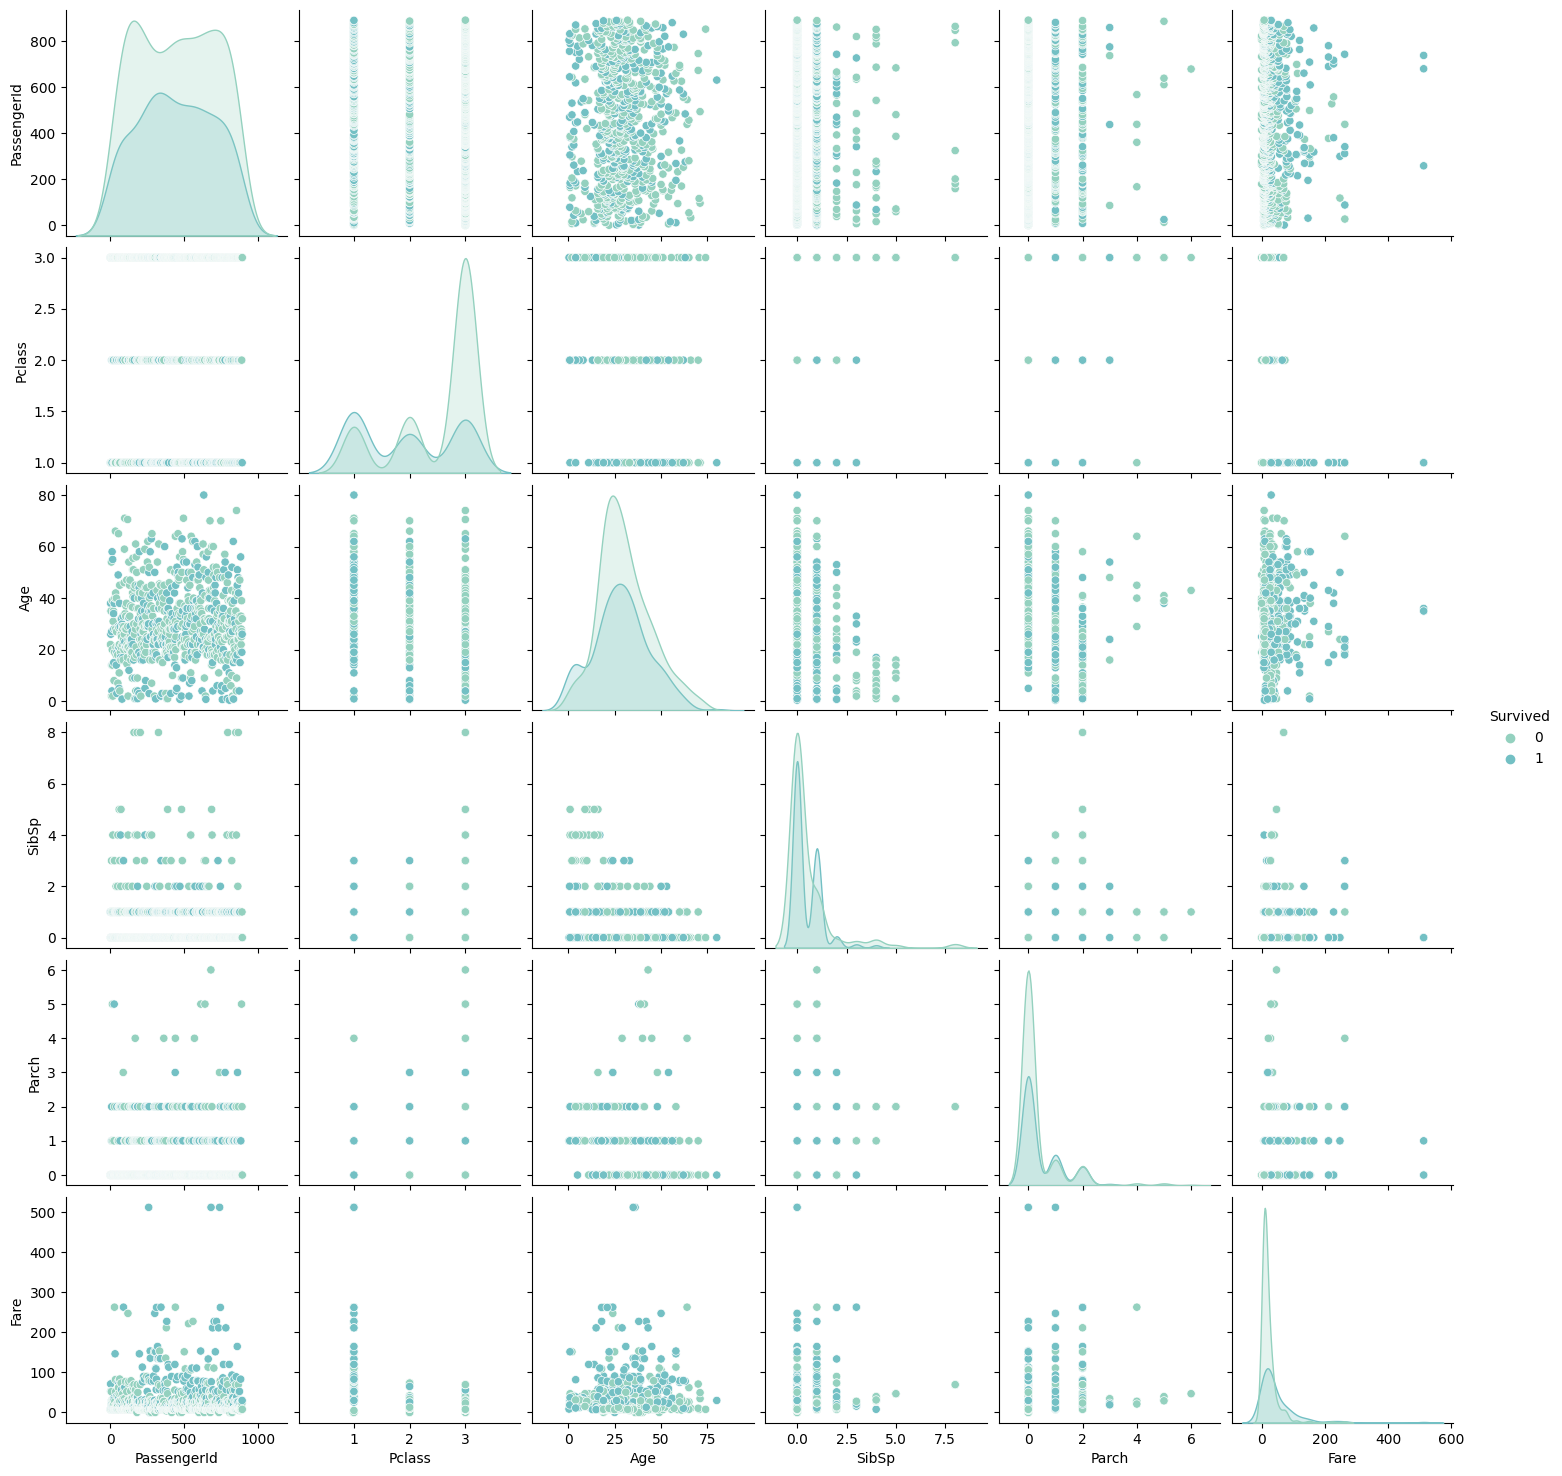

In [62]:
sns.pairplot(titanic, hue="Survived")

## Proporcion de sobravida

In [63]:
titanic[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values("Survived")

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


## Particion de Conjuntos Train Test

In [77]:
from sklearn.model_selection import train_test_split
X = titanic[["Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
Y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.3, random_state  = 0)

In [78]:
y_train.sum() / y_test.count()

0.9029850746268657

In [79]:
titanic.Survived.sum() / titanic.Survived.count()

0.3838383838383838

In [80]:
from sklearn.impute import SimpleImputer
imp_cabina = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_cabina.fit(titanic[["Cabin"]])
X_train[["CabinImp"]] = pd.DataFrame(imp_cabina.transform(titanic[["Cabin"]]))

In [83]:
from sklearn.impute import SimpleImputer
imp_embarque = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_embarque.fit(titanic[["Embarked"]])
X_train[["EmbarkedImp"]] = pd.DataFrame(imp_embarque.transform(titanic[["Embarked"]]))

In [82]:
from sklearn.impute import KNNImputer
imp_age = KNNImputer(n_neighbors=3)
imp_age.fit(titanic[["Age"]])
X_train[["AgeImp"]] = pd.DataFrame(imp_age.transform(titanic[["Age"]]))

In [84]:
X_train.isna().count()

Sex            623
Age            623
SibSp          623
Parch          623
Fare           623
Cabin          623
Embarked       623
CabinImp       623
EmbarkedImp    623
AgeImp         623
dtype: int64

## Transformación

In [85]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,CabinImp,EmbarkedImp,AgeImp
857,male,51.0,0,0,26.5500,E17,S,E17,S,51.000000
52,female,49.0,1,0,76.7292,D33,C,D33,C,49.000000
386,male,1.0,5,2,46.9000,NaN,S,B96 B98,S,1.000000
124,male,54.0,0,1,77.2875,D26,S,D26,S,54.000000
578,female,NaN,1,0,14.4583,NaN,C,B96 B98,C,29.699118


In [ ]:
n_comp= 3
from sklearn.decomposition import PCA


In [ ]:
##Ajuste del modelo
